## **Tarefa 1: MO433 - Aprendizado não supervisionado**

## **Equipe:**

* Elian Laura  | 265685
* Iury Cleveston  | 230216

In [2]:
!wget http://fimi.ua.ac.be/data/retail.dat 

--2021-10-18 23:39:59--  http://fimi.ua.ac.be/data/retail.dat
Resolving fimi.ua.ac.be (fimi.ua.ac.be)... 143.129.69.1
Connecting to fimi.ua.ac.be (fimi.ua.ac.be)|143.129.69.1|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://fimi.uantwerpen.be/data/retail.dat [following]
--2021-10-18 23:39:59--  http://fimi.uantwerpen.be/data/retail.dat
Resolving fimi.uantwerpen.be (fimi.uantwerpen.be)... 143.129.69.1
Reusing existing connection to fimi.ua.ac.be:80.
HTTP request sent, awaiting response... 200 OK
Length: 4167490 (4.0M)
Saving to: ‘retail.dat.1’

retail.dat.1        100%[===================>]   3.97M  5.67MB/s    in 0.7s    

2021-10-18 23:40:00 (5.67 MB/s) - ‘retail.dat.1’ saved [4167490/4167490]



### Algoritmo apriori

In [1]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=0acd28dbe62c7e1902fa9247079caaf3946c9dcd51b2839f628d8d159a7d9cd0
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [3]:
from apyori import apriori
import matplotlib.pyplot as plt

In [6]:
transactions = []

# Load the data
for line in open('retail.dat', 'r'):
    
    # Remove spaces
    items = line.strip()
    
    # Split and add the items to the transaction
    transactions.append(items.split(' '))


# Initialize the apriori generator
results_generator = apriori(transactions, min_support=0.005, min_confidence=0.9)

In [7]:
# Convert the generator into a list
results = list(results_generator)

In [48]:
# Show the rules with support, confidence and lift
print(' Rule \t\t\t Support,  Confidence,  Lift')
for i in results:    
    items_base = list(i.ordered_statistics[0].items_base)
    items_add = list(i.ordered_statistics[0].items_add)
    
    print(', '.join(items_base) + ' => ' + ','.join(items_add) + '\t\t' + str( round(i[1], 3)) + ', ' + str( round(i[2][0][2], 3) )   + ', ' + str(round(i[2][0][3], 3) ) )

 Rule 			 Support,  Confidence,  Lift
105 => 38		0.007, 0.979, 5.532
110 => 38		0.031, 0.975, 5.513
16011 => 16010		0.007, 0.973, 65.19
170 => 38		0.034, 0.978, 5.529
286 => 38		0.013, 0.943, 5.333
36 => 38		0.032, 0.95, 5.372
37 => 38		0.012, 0.974, 5.505
371 => 38		0.009, 0.981, 5.544
55 => 38		0.007, 0.933, 5.275
56 => 38		0.006, 0.961, 5.431
790 => 38		0.006, 0.971, 5.491
105, 39 => 38		0.005, 0.987, 5.578
110, 32 => 38		0.005, 0.987, 5.577
110, 39 => 38		0.02, 0.989, 5.592
41, 110 => 38		0.008, 0.984, 5.561
48, 110 => 38		0.015, 0.986, 5.575
170, 32 => 38		0.006, 0.985, 5.569
170, 39 => 38		0.023, 0.981, 5.543
41, 170 => 38		0.009, 0.986, 5.576
48, 170 => 38		0.017, 0.988, 5.584
39, 286 => 38		0.008, 0.971, 5.487
48, 286 => 38		0.007, 0.983, 5.557
36, 32 => 38		0.005, 0.955, 5.401
36, 39 => 38		0.022, 0.955, 5.398
36, 41 => 38		0.008, 0.959, 5.419
36, 48 => 38		0.015, 0.96, 5.429
39, 37 => 38		0.008, 0.967, 5.469
48, 37 => 38		0.006, 0.986, 5.573
371, 39 => 38		0.006, 0.989, 5.589

In [40]:
# Plot the confidence, support and lift
supports = []
confidences = []
lifts = []
for item in results:

    supports.append(item[1])
    confidences.append(item[2][0][2])
    lifts.append(item[2][0][3])

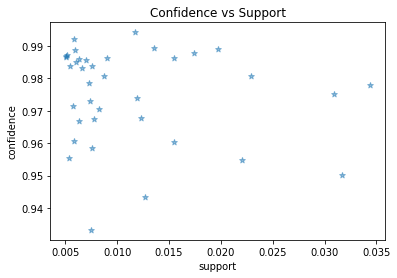

In [41]:
# Plots
plt.title("Confidence vs Support")
plt.scatter(supports, confidences,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

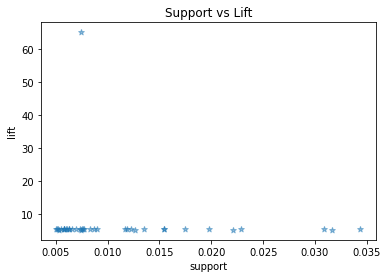

In [19]:
plt.title("Support vs Lift")
plt.scatter(supports, lifts,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('lift') 
plt.show()

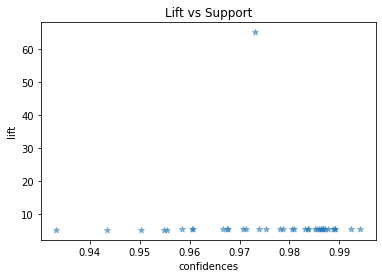

In [12]:
plt.title("Lift vs Support")
plt.scatter(confidences, lifts,   alpha=0.5, marker="*")
plt.xlabel('confidences')
plt.ylabel('lift') 
plt.show()

### Efficient_apriori

In [2]:
!pip install efficient_apriori

In [16]:
from efficient_apriori import apriori
import matplotlib.pyplot as plt

In [20]:
transactions = []

# Load the data
for line in open('retail.dat', 'r'):
    
    # Remove spaces
    items = line.strip()
    
    # Split and add the items to the transaction
    transactions.append(items.split(' '))


# Initialize the apriori generator
itemsets, rules =  apriori(transactions, min_support=0.005, min_confidence=0.9)

In [30]:
for rule in sorted(rules, key=lambda rule: rule.lift):
  print(rule) 

{55} -> {38} (conf: 0.933, supp: 0.007, lift: 5.275, conv: 12.329)
{286} -> {38} (conf: 0.943, supp: 0.013, lift: 5.333, conv: 14.533)
{36} -> {38} (conf: 0.950, supp: 0.032, lift: 5.372, conv: 16.552)
{36, 39} -> {38} (conf: 0.955, supp: 0.022, lift: 5.398, conv: 18.224)
{32, 36} -> {38} (conf: 0.955, supp: 0.005, lift: 5.401, conv: 18.482)
{36, 41} -> {38} (conf: 0.959, supp: 0.008, lift: 5.419, conv: 19.868)
{36, 48} -> {38} (conf: 0.960, supp: 0.015, lift: 5.429, conv: 20.813)
{56} -> {38} (conf: 0.961, supp: 0.006, lift: 5.431, conv: 20.969)
{36, 39, 41} -> {38} (conf: 0.967, supp: 0.006, lift: 5.465, conv: 24.780)
{37, 39} -> {38} (conf: 0.967, supp: 0.008, lift: 5.469, conv: 25.301)
{36, 39, 48} -> {38} (conf: 0.968, supp: 0.012, lift: 5.471, conv: 25.516)
{286, 39} -> {38} (conf: 0.971, supp: 0.008, lift: 5.487, conv: 28.060)
{790} -> {38} (conf: 0.971, supp: 0.006, lift: 5.491, conv: 28.699)
{37} -> {38} (conf: 0.974, supp: 0.012, lift: 5.505, conv: 31.572)
{110} -> {38} (conf

In [21]:
supports = []
confidences = []
lifts = []
greater_lift = 0
for rule in rules:
    supports.append(rule.support)
    confidences.append(rule.confidence)
    lifts.append(rule.lift)

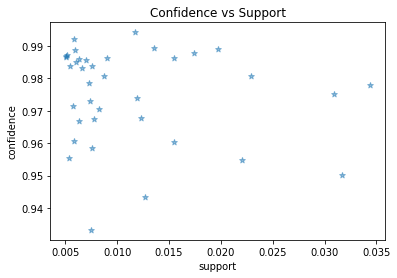

In [31]:
plt.title("Confidence vs Support")
plt.scatter(supports, confidences,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

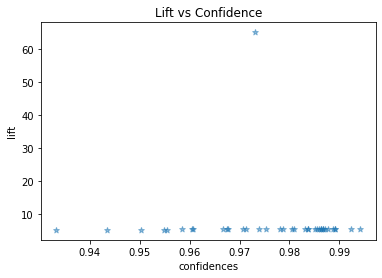

In [32]:
plt.title("Lift vs Confidence")
plt.scatter(confidences, lifts,   alpha=0.5, marker="*")
plt.xlabel('confidences')
plt.ylabel('lift') 
plt.show()

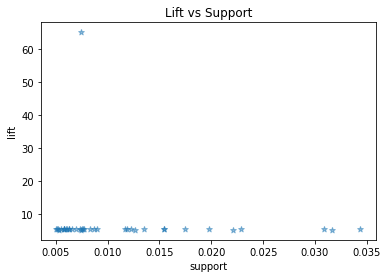

In [33]:
plt.title("Lift vs Support")
plt.scatter(supports, lifts,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('lift') 
plt.show()

### References

https://intelligentonlinetools.com/blog/2018/02/10/how-to-create-data-visualization-for-association-rules-in-data-mining/

https://pypi.org/project/efficient-apriori/

https://medium.com/analytics-vidhya/association-analysis-in-python-2b955d0180c

https://github.com/ymoch/apyori/blob/master/apyori.py